INTRODUCTION

Spotify is a Swedish audio streaming and media services provider founded in April 2006. It is the world's largest music streaming service provider and has over 381 million monthly active users, which also includes 172 million paid subscribers.

Here, We'll exploring and quantify data about music and drawing valuable insights.

Perform an exploratory data analysis (EDA) and data visualization project using data from Spotify using Python.

Data analysis exploring the relationship between the audio features of a song and how positive or negative its lyrics are, involving sentiment analysis.

Includes data collection script that scrapes audio feature data from the Spotify API, as well as lyrical data from the LyricWikiAPI

Spotify Data Analysis makes use of secondary data from Spotify. Learners will use data to identify patterns and relationships between different characteristics. The activity will support learners in developing their ability to review and interpret a dataset. The activity starts by encouraging learners to think of questions that the dataset might answer and thus develop their “Problem” skills. Once the dataset has been analysed learners will have the opportunity to reorganise and restructure data to help them answer their questions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Spotify track Dataset Analysis

In [2]:
track = pd.read_csv(r'C:\Users\raopo\Downloads\track.csv')
pd.set_option('display.max_columns', None)
track.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
track.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
track = track.drop('Unnamed: 0', axis = 1)
track.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [6]:
track.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


### Top 10 most popular songs on Spotify

In [7]:
track.sort_values(by = 'popularity', ascending = False).head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin


### Top 10 least popular songs on Spotify

In [8]:
track.sort_values(by='popularity', ascending = True).head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
56999,4zJLkYcHGjWuf2Ui0eVAso,Håkan Hellström,LUGNA LÅTAR,Det kommer aldrig va över för mig,0,267106,False,0.554,0.877,0,-6.515,1,0.0469,0.01200,0.000039,0.4990,0.499,127.034,4,indie-pop
68346,3bvSoEdHqhDv5jmIP0qfIo,Brray,Homecoming Latin Party,Bichotes Con Clase,0,193400,True,0.786,0.825,1,-5.191,0,0.2590,0.08720,0.003270,0.1470,0.752,180.026,4,latino
68347,25WU3f3gv6ATdPtSG5cybu,Don Omar;Juan Magán,Perreo Tenebroso Vol. 4,No Sigue Modas Aka Ella No Sigue Modas,0,232000,False,0.685,0.862,0,-4.611,1,0.0627,0.00757,0.001400,0.0226,0.884,128.032,4,latino
19647,0EBP3qfDpCZE2skX3PfbTf,Tracy Lawrence,Chillin' It - Mellow Day Country,Just You and Me,0,220133,False,0.585,0.340,2,-8.433,0,0.0243,0.76700,0.000004,0.2540,0.260,100.379,4,country
68361,5Ct6xnkAQJ7lZXp7vHM8uF,Chris Jedi;Ozuna;Brytiago,Perreo Tenebroso Vol. 4,Bipolar,0,220080,False,0.782,0.697,1,-5.850,1,0.0618,0.32000,0.000000,0.1440,0.416,76.031,4,latino
19645,5wW7fkOaNCKHM8NvEDf8Kh,Big & Rich;Bon Jovi,Chillin' It - Mellow Day Country,Born Again,0,234946,False,0.476,0.888,0,-4.926,1,0.0534,0.01310,0.000000,0.2770,0.617,162.000,4,country
19644,3yz60wsJlg630mjAfU4qIv,Steve Earle,Good Times Country,Go Amanda,0,214720,False,0.326,0.716,10,-3.547,1,0.0306,0.00227,0.001710,0.1230,0.648,143.148,4,country
19643,4BviPcJC1obuSn4sKkyRqG,Tracy Lawrence,Country Car Hits,Excitable Boy,0,176760,False,0.628,0.854,7,-7.045,1,0.0343,0.08270,0.023200,0.1530,0.922,151.551,4,country
19642,1up0F8kK6mgObzqWi9Myom,Steve Earle,Finest Country,Jerusalem,0,236186,False,0.445,0.776,2,-4.492,1,0.0346,0.00252,0.007400,0.0981,0.403,118.379,4,country
19641,4FQDsvQMu5ny7mY8ehv4vP,Sugarland,Christmas Country Songs 2022,Winter Wonderland,0,146973,False,0.587,0.876,9,-5.439,1,0.0432,0.12000,0.000000,0.0921,0.724,133.010,4,country


### Check artist at 18th row of Spotify Tracks Dataset

In [9]:
track[['artists']].iloc[18]

artists    Jason Mraz;Colbie Caillat
Name: 18, dtype: object

### Converting duration from millisecond to second on Spotify Tracks Dataset

In [10]:
# (df['duration_ms'])/1000
track['duration'] = (track['duration_ms'].apply(lambda x:(x)/1000)).round()
# track.head()
track.drop('duration_ms', axis =1, inplace = True)

In [11]:
track.head()

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,231.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,150.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,211.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,202.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,199.0


### Correlation Heatmap between Variable 

In [12]:
hm = track.corr(numeric_only = True)
hm

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
popularity,1.000000,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073,-0.007101
explicit,0.044082,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386,-0.065277
danceability,0.035448,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218,-0.073424
energy,0.001056,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126,0.058521
key,-0.003853,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065,0.008132
loudness,0.050423,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992,-0.003464
mode,-0.013931,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092,-0.035552
speechiness,-0.044927,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011,-0.062612
acousticness,-0.025472,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138,-0.103786
instrumentalness,-0.095139,-0.103404,-0.185606,-0.181879,-0.006823,-0.433477,-0.049955,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330,-0.082580,0.124365


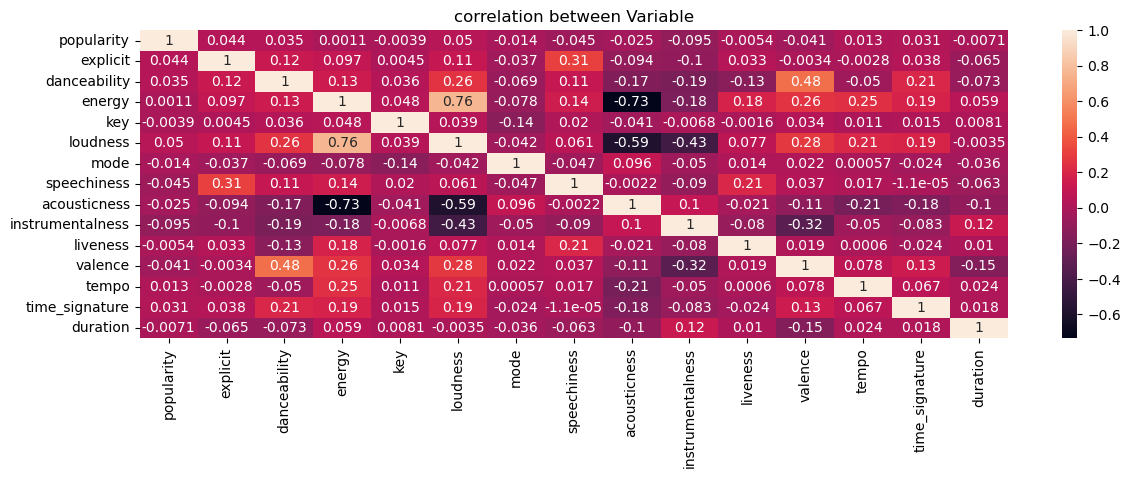

In [13]:
plt.figure(figsize = (14, 4))
sns.heatmap(hm, annot = True)
plt.title('correlation between Variable')
plt.show()

### Considering 0.4% of the total dataset to create Regression plots

In [14]:
sample_size = int(len(track) * 0.004)
sam_df = track.sample(sample_size)
len(sam_df)

456

### Regression plot - Correlation between Loudness and Energy and Correlation between Popularity and Acousticness

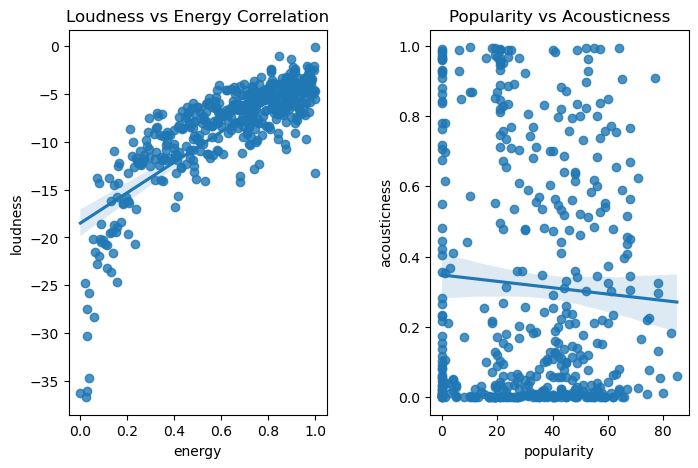

In [16]:
plt.figure(figsize = (8, 5))
plt.subplot(1, 2, 1)
sns.regplot(sam_df, x= 'energy', y= 'loudness')
plt.title('Loudness vs Energy Correlation')

plt.subplot(1, 2, 2)
sns.regplot(sam_df, x= 'popularity', y= 'acousticness')
plt.title('Popularity vs Acousticness')

plt.subplots_adjust(wspace = 0.4)
plt.show()

## Spotify Features Dataset Analysis

In [17]:
genre = pd.read_csv(r'C:\Users\raopo\Downloads\SpotifyFeatures.csv')
genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Duration of songs in different Genres

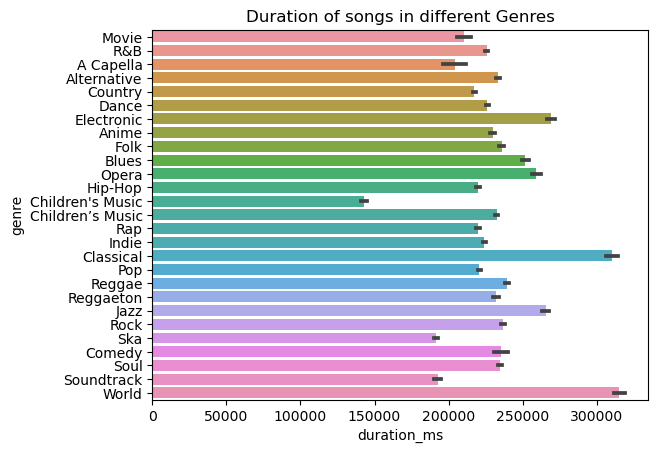

In [18]:
sns.barplot(data = genre, x = 'duration_ms', y = 'genre')
plt.title('Duration of songs in different Genres')
plt.show()

### Top 5 Genres by Popularity

In [19]:
top = genre.sort_values(by = 'popularity', ascending = False).head()
top

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
